In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.metrics import f1_score, make_scorer, classification_report
from scipy.stats import randint
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, RobustScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)

In [2]:
df = pd.read_csv('credit-card-fraud.csv')

In [3]:
df.head()

,Unnamed: 0.1,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 24 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Unnamed: 0.1           int64  
 1   Unnamed: 0             int64  
 2   trans_date_trans_time  object 
 3   cc_num                 int64  
 4   merchant               object 
 5   category               object 
 6   amt                    float64
 7   first                  object 
 8   last                   object 
 9   gender                 object 
 10  street                 object 
 11  city                   object 
 12  state                  object 
 13  zip                    int64  
 14  lat                    float64
 15  long                   float64
 16  city_pop               int64  
 17  job                    object 
 18  dob                    object 
 19  trans_num              object 
 20  unix_time              int64  
 21  merch_lat              float64
 22  merch_long        

In [5]:
df.isna().sum()

Unnamed: 0.1             0
Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

# EDA 

array([[<Axes: title={'center': 'Unnamed: 0.1'}>,
        <Axes: title={'center': 'Unnamed: 0'}>,
        <Axes: title={'center': 'cc_num'}>],
       [<Axes: title={'center': 'amt'}>, <Axes: title={'center': 'zip'}>,
        <Axes: title={'center': 'lat'}>],
       [<Axes: title={'center': 'long'}>,
        <Axes: title={'center': 'city_pop'}>,
        <Axes: title={'center': 'unix_time'}>],
       [<Axes: title={'center': 'merch_lat'}>,
        <Axes: title={'center': 'merch_long'}>,
        <Axes: title={'center': 'is_fraud'}>]], dtype=object)

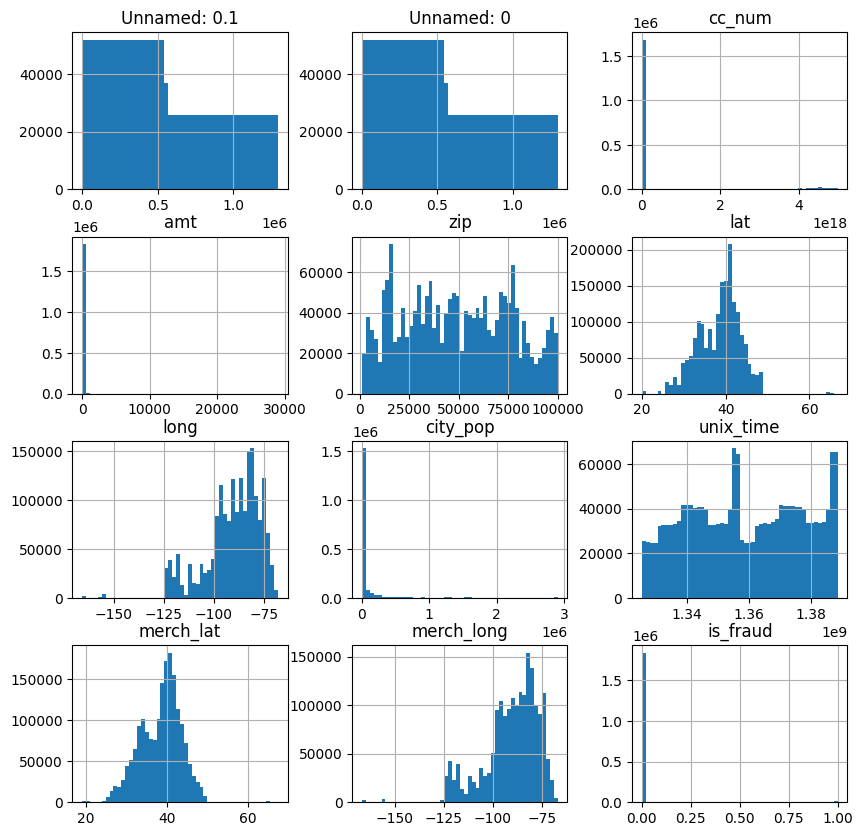

In [6]:
df.hist(bins=50, figsize=(10,10))

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0.1,1852394.0,5.371934e+05,3.669110e+05,0.000000e+00,2.315490e+05,4.630980e+05,8.335758e+05,1.296674e+06
Unnamed: 0,1852394.0,5.371934e+05,3.669110e+05,0.000000e+00,2.315490e+05,4.630980e+05,8.335758e+05,1.296674e+06
cc_num,1852394.0,4.173860e+17,1.309115e+18,6.041621e+10,1.800429e+14,3.521417e+15,4.642255e+15,4.992346e+18
amt,1852394.0,7.006357e+01,1.592540e+02,1.000000e+00,9.640000e+00,4.745000e+01,8.310000e+01,2.894890e+04
zip,1852394.0,4.881326e+04,2.688185e+04,1.257000e+03,2.623700e+04,4.817400e+04,7.204200e+04,9.992100e+04
lat,1852394.0,3.853931e+01,5.071470e+00,2.002710e+01,3.466890e+01,3.935430e+01,4.194040e+01,6.669330e+01
long,1852394.0,-9.022783e+01,1.374789e+01,-1.656723e+02,-9.679800e+01,-8.747690e+01,-8.015800e+01,-6.795030e+01
city_pop,1852394.0,8.864367e+04,3.014876e+05,2.300000e+01,7.410000e+02,2.443000e+03,2.032800e+04,2.906700e+06
unix_time,1852394.0,1.358674e+09,1.819508e+07,1.325376e+09,1.343017e+09,1.357089e+09,1.374581e+09,1.388534e+09
merch_lat,1852394.0,3.853898e+01,5.105604e+00,1.902742e+01,3.474012e+01,3.936890e+01,4.195626e+01,6.751027e+01


In [8]:
fraud_counts = df['is_fraud'].value_counts().reset_index()
fraud_counts.columns = ['is_fraud', 'count']
fraud_counts['is_fraud'] = fraud_counts['is_fraud'].map({0: 'Not Fraud', 1: 'Fraud'})

fig = px.pie(fraud_counts, values='count', names='is_fraud', title='Fraudulent Transactions vs Non-Fraudulent Transactions')
fig.show()

# Top Locations for Fraudulent Activity

In [9]:
fraud_counts = df[df['is_fraud'] == 1]['category'].value_counts()
order = fraud_counts.index

fraud_df = df[df['is_fraud'] == 1]['category'].value_counts().reset_index()
fraud_df.columns = ['category', 'count']

fig = px.bar(fraud_df, x='category', y='count', category_orders={'category': order},
             title='Top Locations for Fraudulent Activity', labels={'category': 'Place', 'count': 'No. of frauds'})

fig.update_layout(xaxis={'categoryorder': 'array', 'categoryarray': order}, xaxis_title='Places', yaxis_title='No. of frauds')
fig.update_xaxes(tickangle=45)

fig.show()

In [10]:
temp = df.copy()

# Distribution of Fraudulent Activity by Hour

In [11]:
temp = df.copy()
temp['trans_date_trans_time'] = pd.to_datetime(temp['trans_date_trans_time'])
temp['hours'] = temp['trans_date_trans_time'].dt.hour
temp['day'] = temp['trans_date_trans_time'].dt.dayofweek

fraud_data = temp[temp['is_fraud'] == 1]

fig = px.histogram(fraud_data, x='hours', title='Distribution of Fraudulent Activity by Hour',
                   labels={'hours': 'Hour of the Day', 'count': 'Number of Frauds'}, nbins=24)

fig.update_layout(xaxis_title='Hour of the Day', yaxis_title='Number of Frauds')
fig.update_xaxes(dtick=1)

fig.show()

# Distribution of Fraudulent Activity by Weekday

In [12]:
fig = px.histogram(fraud_data, x='day', title='Distribution of Fraudulent Activity by Day',
                      labels={'day': 'Weekday', 'count': 'Number of Frauds'}, nbins=7)
fig.update_layout(xaxis_title='Weekdays', yaxis_title='Number of Frauds')
fig.show()

# Top 10 cities by number of frauds

In [13]:
top_cities = temp[temp['is_fraud'] == 1]['city'].value_counts().head(10).index
filtered_data = temp[(temp['is_fraud'] == 1) & (temp['city'].isin(top_cities))]
city_fraud_counts = filtered_data['city'].value_counts().reset_index()
city_fraud_counts.columns = ['city', 'count']
sorted_order = city_fraud_counts['city']

fig = px.bar(city_fraud_counts, x='city', y='count', title='Top 10 Cities by Fraudulent Activity',
             labels={'city': 'City', 'count': 'Number of Frauds'}, category_orders={'city': sorted_order})

fig.update_layout(xaxis_title='City', yaxis_title='Number of Frauds')
fig.update_xaxes(tickangle=45, tickmode='array', tickvals=sorted_order, ticktext=sorted_order)

fig.show()

# Fraudulent Activity by Locations 

In [14]:
import plotly.express as px
fraud_data = temp[temp['is_fraud'] == 1]

# Create a scatter mapbox plot
fig = px.scatter_mapbox(
    fraud_data,
    lat="lat",
    lon="long",
    color="is_fraud",
    color_continuous_scale="Reds",
    size_max=15,
    title="Fraudulent Activity by Location",
    zoom=10,
    mapbox_style="open-street-map"
)

# Show the plot
fig.show()

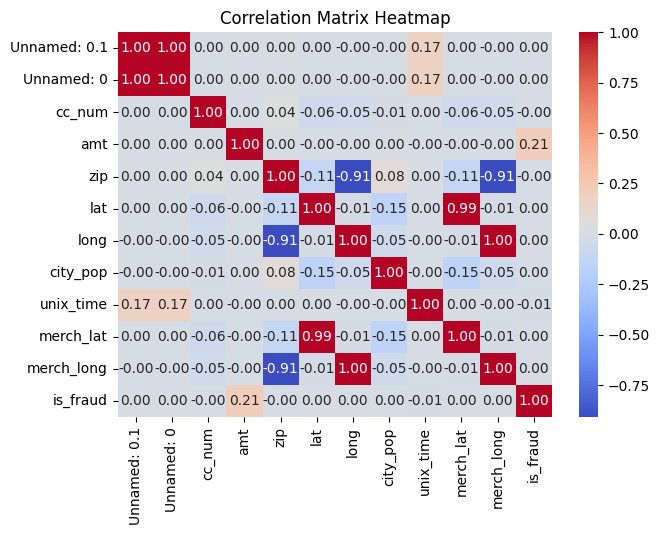

In [15]:
plt.figure(figsize=(7,5))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

# Preprocessing

In [16]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import StandardScaler, LabelEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans

# Custom transformer to preprocess date and time features
class DateTimePreprocessor(BaseEstimator, TransformerMixin):
    def __init__(self, column):
        self.column = column

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        df = X.copy()
        df[self.column] = pd.to_datetime(df[self.column])
        df['year'] = df[self.column].dt.year
        df['month'] = df[self.column].dt.month
        df['day'] = df[self.column].dt.day
        df['hour'] = df[self.column].dt.hour
        df['minute'] = df[self.column].dt.minute
        df['second'] = df[self.column].dt.second
        df['day_of_week'] = df[self.column].dt.dayofweek
        
        def get_part_of_day(hour):
            if hour < 6:
                return 'Night'
            elif hour < 12:
                return 'Morning'
            elif hour < 18:
                return 'Afternoon'
            else:
                return 'Evening'
        
        df['part_of_day'] = df['hour'].apply(get_part_of_day)
        df['is_weekend'] = df['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)
        df = df.drop(columns=[self.column])
        return df

# Custom transformer to calculate age
class AgeCalculator(BaseEstimator, TransformerMixin):
    def __init__(self, dob_column):
        self.dob_column = dob_column

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        current_year = pd.Timestamp.now().year
        X['age'] = current_year - pd.to_datetime(X[self.dob_column]).dt.year
        return X.drop(columns=[self.dob_column])

# Custom transformer for label encoding
class CustomLabelEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns
        self.encoders = {col: LabelEncoder() for col in columns}

    def fit(self, X, y=None):
        for col in self.columns:
            self.encoders[col].fit(X[col])
        return self

    def transform(self, X):
        X_copy = X.copy()
        for col in self.columns:
            X_copy[col] = self.encoders[col].transform(X_copy[col])
        return X_copy

# Custom transformer for clustering
class LocationClusterer(BaseEstimator, TransformerMixin):
    def __init__(self, customer_columns, merchant_columns, customer_n_clusters=10, merchant_n_clusters=10):
        self.customer_columns = customer_columns
        self.merchant_columns = merchant_columns
        self.customer_n_clusters = customer_n_clusters
        self.merchant_n_clusters = merchant_n_clusters
        self.scaler_customer = StandardScaler()
        self.scaler_merchant = StandardScaler()
        self.kmeans_customer = KMeans(n_clusters=customer_n_clusters, n_init='auto', random_state=42)
        self.kmeans_merchant = KMeans(n_clusters=merchant_n_clusters, n_init='auto', random_state=42)

    def fit(self, X, y=None):
        self.scaler_customer.fit(X[self.customer_columns])
        self.scaler_merchant.fit(X[self.merchant_columns])
        self.kmeans_customer.fit(self.scaler_customer.transform(X[self.customer_columns]))
        self.kmeans_merchant.fit(self.scaler_merchant.transform(X[self.merchant_columns]))
        return self

    def transform(self, X):
        X_copy = X.copy()
        X_copy['customer_location_cluster'] = self.kmeans_customer.predict(self.scaler_customer.transform(X[self.customer_columns]))
        X_copy['merchant_location_cluster'] = self.kmeans_merchant.predict(self.scaler_merchant.transform(X[self.merchant_columns]))
        return X_copy

# Custom transformer for reordering columns
class ColumnReorderer(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[self.columns]
    
# Custom Transformer for dropping unnecessary rows
class ColumnDropper(BaseEstimator, TransformerMixin):
    def __init__(self, columns_to_drop):
        self.columns_to_drop = columns_to_drop

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X.drop(columns=self.columns_to_drop)


# Defining the pipeline
column_order = [
    'year', 'month', 'day', 'hour', 'minute', 'second', 'day_of_week', 'part_of_day', 'is_weekend',
    'merchant', 'category', 'amt', 'gender', 'lat', 'long', 'city_pop', 'unix_time', 'merch_lat', 
    'merch_long', 'age', 'customer_location_cluster', 'merchant_location_cluster'
]

preprocessing_pipeline = Pipeline([
    ('datetime_preprocessing', DateTimePreprocessor('trans_date_trans_time')),
    ('age_calculator', AgeCalculator('dob')),
    ('label_encoding', CustomLabelEncoder(columns=['gender', 'merchant', 'category', 'part_of_day'])),
    ('location_clustering', LocationClusterer(customer_columns=['lat', 'long'], merchant_columns=['merch_lat', 'merch_long'])),
    ('drop_columns', ColumnDropper(columns_to_drop=['Unnamed: 0.1', 'Unnamed: 0', 'trans_num', 'first', 'last', 'cc_num', 'street', 'city', 'state', 'zip', 'job'])),
    ('column_reordering', ColumnReorderer(columns=column_order))
])

# Fit and transform the DataFrame
processed_df = preprocessing_pipeline.fit_transform(df)
processed_df['is_fraud'] = df['is_fraud']



# Applying the pipeline
processed_df = preprocessing_pipeline.fit_transform(df)
processed_df['is_fraud'] = df['is_fraud']

In [17]:
processed_df.head()

,year,month,day,hour,minute,second,day_of_week,part_of_day,is_weekend,merchant,category,amt,gender,lat,long,city_pop,unix_time,merch_lat,merch_long,age,customer_location_cluster,merchant_location_cluster,is_fraud
0,2019,1,1,0,0,18,1,3,0,514,8,4.97,0,36.0788,-81.1781,3495,1325376018,36.011293,-82.048315,36,6,5,0
1,2019,1,1,0,0,44,1,3,0,241,4,107.23,0,48.8878,-118.2105,149,1325376044,49.159047,-118.186462,46,5,4,0
2,2019,1,1,0,0,51,1,3,0,390,0,220.11,1,42.1808,-112.2620,4154,1325376051,43.150704,-112.154481,62,5,4,0
3,2019,1,1,0,1,16,1,3,0,360,2,45.00,1,46.2306,-112.1138,1939,1325376076,47.034331,-112.561071,57,5,4,0
4,2019,1,1,0,3,6,1,3,0,297,9,41.96,1,38.4207,-79.4629,99,1325376186,38.674999,-78.632459,38,1,1,0


# Preparing training & test sets

In [18]:
train, test = train_test_split(df, test_size=0.2, stratify=df['is_fraud'], random_state=42, shuffle=True)

train_X, train_y = train.drop('is_fraud', axis=1).copy(), train['is_fraud'].copy()
test_X, test_y = test.drop('is_fraud', axis=1).copy(), test['is_fraud'].copy()

# Model training-

- XGB

In [19]:
from xgboost import XGBClassifier

xgb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessing_pipeline),
    ('classifier', XGBClassifier(objective='binary:logistic'))
])

# Fit the pipeline
xgb_pipeline.fit(train_X, train_y)

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('datetime_preprocessing',
                                  DateTimePreprocessor(column='trans_date_trans_time')),
                                 ('age_calculator',
                                  AgeCalculator(dob_column='dob')),
                                 ('label_encoding',
                                  CustomLabelEncoder(columns=['gender',
                                                              'merchant',
                                                              'category',
                                                              'part_of_day'])),
                                 ('location_clustering',
                                  LocationClusterer(customer_columns=['lat',
                                                                      'long'],
                                                    merc...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [20]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score, make_scorer

def custom_f1_class1(y_true, y_pred):
    return f1_score(y_true, y_pred, pos_label=1) # f1 score for fraud class

f1_scorer = make_scorer(custom_f1_class1)
cross_val_score(xgb_pipeline, train_X, train_y, cv=3, scoring = f1_scorer).mean()

0.8787352833815886

# Hyperparameter tuning

In [21]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

# Define the parameter grid
param_dist = {
    'classifier__n_estimators': randint(50, 300),
    'classifier__max_depth': randint(3, 15),
    'classifier__learning_rate': uniform(0.01, 0.3),
    'classifier__subsample': uniform(0.5, 0.5),
    'classifier__colsample_bytree': uniform(0.5, 0.5),
    'classifier__gamma': uniform(0, 1)
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb_pipeline,
    param_distributions=param_dist,
    n_iter=10, 
    scoring=f1_scorer,
    cv=5,  
    verbose=1,  
    n_jobs=-1,  
    random_state=42 
)

# Fit RandomizedSearchCV
random_search.fit(train_X, train_y)

# Output the best parameters and the best score
print("Best Parameters:", random_search.best_params_)
print("Best F1 Score:", random_search.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters: {'classifier__colsample_bytree': 0.6872700594236812, 'classifier__gamma': 0.9507143064099162, 'classifier__learning_rate': 0.22959818254342154, 'classifier__max_depth': 7, 'classifier__n_estimators': 152, 'classifier__subsample': 0.7229163764267956}
Best F1 Score: 0.8904116343092283


# Model Evaluation on Test sets

In [22]:
best_model = random_search.best_estimator_
pred = best_model.predict(test_X)
print(classification_report(test_y, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    368549
           1       0.97      0.84      0.90      1930

    accuracy                           1.00    370479
   macro avg       0.99      0.92      0.95    370479
weighted avg       1.00      1.00      1.00    370479



# Saving Model

In [23]:
import joblib

joblib.dump(best_model, 'Credit-card-Fraud-Model.pkl')

['Credit-card-Fraud-Model.pkl']